## 实现简单线性回归法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

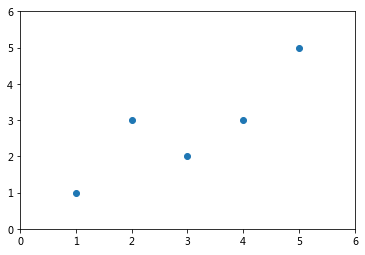

In [3]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

$\Large{\quad a\quad=\quad \frac{\displaystyle\sum_{i=1}^{m}(x^{(i)}-\bar{x})(y^{(i)}-\bar{y})}{\displaystyle\sum_{i=1}^{m}(x^{(i)}-\bar{x})^2}\quad\quad\quad  b\quad=\bar{y}-a\bar{x}}$

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
num = 0.0          #分子
d = 0.0            #分母
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [6]:
a = num / d
b = y_mean - a * x_mean

In [7]:
a

0.8

In [8]:
b

0.39999999999999947

In [9]:
y_hat = a * x + b

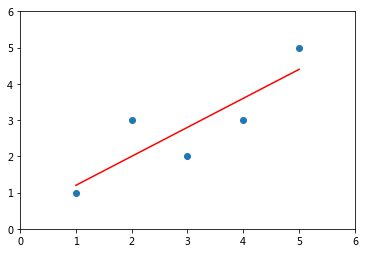

In [10]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

In [11]:
x_predict = 6
y_predict = a * x_predict + b

In [12]:
y_predict

5.2

## 封装我们自己的SimpleLinearRegression

In [13]:
from playML.SimpleLinearRegression import SimpleLinearRegression1

reg1 = SimpleLinearRegression1()
reg1.fit(x, y)
reg1.predict(np.array([x_predict]))

array([5.2])

In [14]:
reg1.a_

0.8

In [15]:
reg1.b_

0.39999999999999947

In [16]:
y_hat1 = reg1.predict(x)

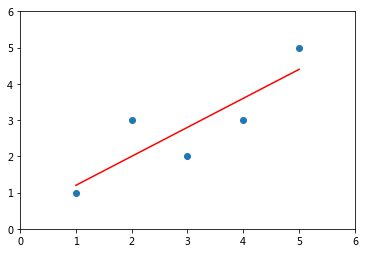

In [17]:
plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

## 向量化运算实现SimpleLinearRegression

In [18]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

In [19]:
reg2 = SimpleLinearRegression2()
reg2.fit(x, y)

SimpleLinearRegression2()

In [20]:
reg2.a_

0.8

In [21]:
reg2.b_

0.39999999999999947

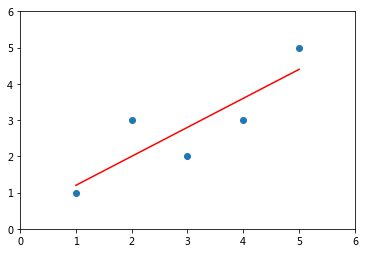

In [22]:
y_hat2 = reg1.predict(x)

plt.scatter(x, y)
plt.plot(x, y_hat2, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

## 向量化实现的性能测试

In [23]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2 + 3 + np.random.normal(size=m)  #生成呈正态分布的噪音

In [24]:
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

1.1 s ± 47.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25.9 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
reg1.a_

1.9953248177300493

In [26]:
reg1.b_

3.001835853546684

In [27]:
reg2.a_

1.995324817729954

In [28]:
reg2.b_

3.0018358535467318